# __Information Assurance__

## __Evolving trends in Information Assurance, a NLP analysis of the Literatire from 1967 to 2024__

In this work, we will carry out a Systematic Topic Review (STR) for topic extraction and Chain of Density (CoD) for summarizing the contents.

The ultimate goal of this work is to perform sumatizations for each decade from 1967 to the present to understand what has been researched in matters of information assurance.

# <font color='blue'>__Analysis per decades__</font>

## Preamble

In [ ]:
%%capture
!pip install watermark
!pip install spacy-model-en-core-web-lg
# To print images
!pip install -U kaleido
!pip install -U plotly

In [ ]:
# Similarity analysis
import spacy

In [ ]:
%%capture
!python -m spacy download en_core_web_lg

In [3]:
import pandas as pd

# Plotting
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter

# Plots to png
import kaleido
# Serialization
import pickle
import os

%load_ext watermark

In [ ]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Git hash: 

pandas    : 2.0.3
matplotlib: 3.7.1
plotly    : 5.20.0
kaleido   : 0.2.1
spacy     : 3.7.4



## Data

In [4]:
path_file = '/content/drive/MyDrive/_RESEACH/Information_assurance/Data/'
img_path = '/content/drive/MyDrive/_RESEACH/Information_assurance/img/'

In [5]:
os.chdir(path_file)

In [ ]:
# To pickle
with open(path_file + 'df_scopus_info_assurance_v2.pkl', 'rb') as f:
  df = pickle.load(f)


In [ ]:
# From pickle
with open(path_file + 'df_scopus_info_assurance_v2.pkl', 'rb') as f:
  df = pd.read_pickle(f)
len(df)

62344

In [ ]:
df = df[df['Abstract'] != '[No abstract available]'].reset_index(drop=True)
len(df)

60793

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60793 entries, 0 to 60792
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            58496 non-null  object 
 1   Author full names  58496 non-null  object 
 2   Author(s) ID       58496 non-null  object 
 3   Title              60792 non-null  object 
 4   Year               60793 non-null  int64  
 5   Cited by           60789 non-null  float64
 6   DOI                50292 non-null  object 
 7   Link               60793 non-null  object 
 8   Abstract           60793 non-null  object 
 9   Author Keywords    49090 non-null  object 
 10  Index Keywords     47815 non-null  object 
 11  Document Type      33314 non-null  object 
 12  Source             33314 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 6.0+ MB


## __Cleaning most common problems in the data__

In [ ]:
# reemplaza las comas ',' por punto y coma ';'
# Como hay valores null, se rellenan con un vacío ''

df['Author Keywords'] = df['Author Keywords'].fillna('').apply(lambda x: x.replace(',', ';'))
df['Index Keywords'] = df['Index Keywords'].fillna('').apply(lambda x: x.replace(',', ';'))
df['Author Keywords'] = df['Author Keywords'].fillna('').apply(lambda x: x.replace('"', ''))
df['Index Keywords'] = df['Index Keywords'].fillna('').apply(lambda x: x.replace('"', ''))

In [ ]:
df['Author Keywords'] = df['Author Keywords'].str.lower()
df['Index Keywords'] = df['Index Keywords'].str.lower()

In [ ]:
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('wi - fi', 'wi-fi'))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('wi - fi', 'wi-fi'))
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('national - infraestructure', 'national-infraestructure'))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('national - infraestructure', 'national-infraestructure'))
df['Author Keywords'] = df['Author Keywords'].fillna('').apply(lambda x: x.replace(' - ', '; '))


In [ ]:
# Eliminating special quotation marks : “hybrid wars”
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('“', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('“', ''))
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('”', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('”', ''))

In [ ]:
# Eliminting weird characters '•' and ' '—'
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('•', ''))
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('—', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('•', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('—', ''))


In [ ]:
#
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('index term', ''))
df['Author Keywords'] = df['Author Keywords'].apply(lambda x: x.replace('index terms', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('index term', ''))
df['Index Keywords'] = df['Index Keywords'].apply(lambda x: x.replace('index terms', ''))


In [ ]:
# Define the start and end year for each decade
decades = {
    '1960s': (1960, 1969),
    '1970s': (1970, 1979),
    '1980s': (1980, 1989),
    '1990s': (1990, 1999),
    '2000s': (2000, 2009),
    '2010s': (2010, 2019),
    '2020s': (2020, 2024),  # Assuming data up to 2024
}

# Initialize a list to store the DataFrames
df_dict = {decade: df[(df['Year'] >= years[0]) & (df['Year'] <= years[1])] for decade, years in decades.items()}

In [ ]:
df_dict['1960s'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 54 to 54
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Authors            1 non-null      object 
 1   Author full names  1 non-null      object 
 2   Author(s) ID       1 non-null      object 
 3   Title              1 non-null      object 
 4   Year               1 non-null      int64  
 5   Cited by           1 non-null      float64
 6   DOI                1 non-null      object 
 7   Link               1 non-null      object 
 8   Abstract           1 non-null      object 
 9   Author Keywords    1 non-null      object 
 10  Index Keywords     1 non-null      object 
 11  Document Type      0 non-null      object 
 12  Source             0 non-null      object 
dtypes: float64(1), int64(1), object(11)
memory usage: 112.0+ bytes


### __Versions__
- Stable version: df_dict_scopus_info_assurance_v2.pkl
- Working version: df_dict_scopus_info_assurance_v3.pkl




In [ ]:
# To pickle
with open(path_file + 'df_dict_scopus_info_assurance_v3.pkl', 'wb') as f:
  pickle.dump(df_dict, f)


In [6]:
# From pickle
with open(path_file + 'df_dict_scopus_info_assurance_v3.pkl', 'rb') as f:
  df_dict = pickle.load(f)

In [7]:
for decade, df_decade in df_dict.items():
    print(f"Decade: {decade}, Length: {len(df_decade)}")

Decade: 1960s, Length: 1
Decade: 1970s, Length: 12
Decade: 1980s, Length: 78
Decade: 1990s, Length: 412
Decade: 2000s, Length: 5972
Decade: 2010s, Length: 22050
Decade: 2020s, Length: 32268


In [ ]:
df_dict['1970s']

,Authors,Author full names,Author(s) ID,Title,Year,Cited by,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Source
0,Anderson J.P.,"Anderson, James P. (56137308100)",56137308100,Information Security in a Multi-User Computer ...,1972,25.0,10.1016/S0065-2458(08)60506-9,https://www.scopus.com/inward/record.uri?eid=2...,The problem of “computer security” ranges from...,,,NaN,NaN
5,Reitman R.P.; Andrews G.R.,"Reitman, Richard P. (6602632313); Andrews, Gre...",6602632313; 7202160811,Certifying information flow properties of prog...,1979,6.0,10.1145/567752.567779,https://www.scopus.com/inward/record.uri?eid=2...,Interesting program properties other than func...,computer security; concurrency; information fl...,parallel programming; security of data; securi...,NaN,NaN
11,Reitman Richard P.,"Reitman, Richard P. (6602632313)",6602632313,MECHANISM FOR INFORMATION CONTROL IN PARALLEL ...,1979,0.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,P. J. Denning and D. E. Denning have shown how...,,data processing,NaN,NaN
12,Koch H.P.,"Koch, H.P. (58458159900)",58458159900,Security in electronic data processing; [SICHE...,1975,0.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Making electronic data safe involves the secur...,,computer; computer analysis; information syste...,NaN,NaN
34,Walter K.G.; Schaen S.I.; Ogden W.F.; Rounds W...,"Walter, K.G. (7101710371); Schaen, S.I. (65074...",7101710371; 6507429185; 7003867914; 6603973809...,Structured specification of a security kernel,1975,0.0,10.1145/390016.808450,https://www.scopus.com/inward/record.uri?eid=2...,Certifying an entire operating system to be re...,compromise security; governmental security; mo...,,NaN,NaN
43,Lennon Richard E.,"Lennon, Richard E. (7005719327)",7005719327,CRYPTOGRAPHY ARCHITECTURE FOR INFORMATION SECU...,1978,11.0,10.1147/sj.172.0138,https://www.scopus.com/inward/record.uri?eid=2...,Information being transferred from point to po...,,computer networks; data processing,NaN,NaN
57,Kaliski Edward J.,"Kaliski, Edward J. (6506224761)",6506224761,PROTECTING YOUR INTELLECTUAL PROPERTY.,1978,1.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Protecting intellectual property is a design f...,,engineering - record preservation; patents and...,NaN,NaN
62,Blom Rolf; Forchheimer Robert; Fak Viiveke; In...,"Blom, Rolf (7005825037); Forchheimer, Robert (...",7005825037; 6603934747; 6602931694; 7005573461,ENCRYPTION METHODS IN DATA NETWORKS.,1978,1.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Data transmitted in a data network with severa...,,data processing - security of data; data trans...,NaN,NaN
73,Walter K.G.; Schaen S.I.; Ogden W.F.; Rounds W...,"Walter, K.G. (7101710371); Schaen, S.I. (65074...",7101710371; 6507429185; 7003867914; 6603973809...,STRUCTURED SPECIFICATION OF A SECURITY KERNEL.,1975,9.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,Certifying an entire operating system to be re...,,computer operating systems - mathematical mode...,NaN,NaN
84,Maeda Kazunobu; Ohashi Akira; Yokoyama Takeshi...,"Maeda, Kazunobu (7404376404); Ohashi, Akira (7...",7404376404; 7103277098; 57207176314; 7401552999,OUTLINE OF NIPPON AIR CARGO CLEARANCE SYSTEM -...,1979,0.0,NaN,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents an outline of NACCS (Nippo...,,data processing; business - governmental appli...,NaN,NaN


In [ ]:
# Keywords per author
author_keywords = Counter([kw.strip().lower() for sublist in df_dict['1980s']['Author Keywords'].dropna().str.split(';') for kw in sublist])

# Keywords per index
index_keywords = Counter([kw.strip().lower() for sublist in df_dict['1980s']['Index Keywords'].dropna().str.split(';') for kw in sublist])

# Union of author and index keywords and sort
all_keywords = sorted(set(author_keywords.keys()).union(set(index_keywords.keys())))

# Mapear las frecuencias a la lista ordenada de palabras clave, usando 0 si no están presentes
author_freq = [author_keywords.get(kw, 0) for kw in all_keywords]
index_freq = [index_keywords.get(kw, 0) for kw in all_keywords]

# Configurar subplots con espacio vertical y altura ajustada, sin subtítulos
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.08)

# Ajustar la altura del gráfico
fig_height = 1500  # Ajusta esto según sea necesario

# Agregar burbujas para Author Keywords
fig.add_trace(go.Scatter(
    x=all_keywords, y=author_freq,
    mode='markers',
    marker=dict(size=[f*10 for f in author_freq], color='LightSkyBlue'),
    name='Author Keyword'
), row=1, col=1)

# Agregar burbujas para Index Keywords
fig.add_trace(go.Scatter(
    x=all_keywords, y=index_freq,
    mode='markers',
    marker=dict(size=[f*10 for f in index_freq], color='Orange'),
    name='Index Keyword'
), row=2, col=1)

# Configuración adicional del gráfico
fig.update_layout(
    title_text="Author Keywords vs Index Keywords comparison",
    height=fig_height,  # Utiliza la altura ajustada aquí
    template='plotly_white'
)

#fig.update_xaxes(title_text="Palabras clave", row=1, col=1)
fig.update_xaxes(title_text="Keyword", row=2, col=1)
fig.update_yaxes(title_text="Author Frecuency", row=1, col=1)
fig.update_yaxes(title_text="Index Frecuency", row=2, col=1)

fig.show()


In Figure X, we observe a comparative visualization between 'Author Keywords' and 'Index Keywords' frequencies across our dataset, encapsulated through a dual bubble chart. The visualization underscores disparities in the prominence of certain terms as perceived by authors versus their prevalence within indexed literature databases. Sizeable blue bubbles epitomize terms frequently cited by authors which may not align with their standardized index counterparts, depicted by the smaller or non-existent pink bubbles. Conversely, dominant pink bubbles reflect terms ubiquitously recognized in academic indexing but potentially underemphasized by authors in their manuscripts. This dichotomy could suggest a divergence in the thematic self-representation by researchers and the taxonomic classifications within scholarly databases. The chart thus serves as a potent analytical tool, providing insights into the alignment between authorial emphasis in keyword selection and its correspondence with established indexing norms, which is instrumental for the optimization of academic search algorithms and enhanced discoverability of scholarly works.

In [9]:
# VERSION en DESARROLLO. Reemplaza a v2

df_dict_freq = {}
df_freq = pd.DataFrame(columns=['Decade', 'Keyword', 'Type', 'Freq_author', 'Freq_index', 'Frequency'])

# prompt: Con el siguiente código genera un counter de author e index para cada llave en df_dict. Guarda la estrcutura en un nuevo df
author_keywords = {}
index_keywords = {}

for decade, df_decade in df_dict.items():
    # Author keywwords
    author_keywords[decade] = Counter([kw.replace('"', '').strip() for sublist in df_dict[decade]['Author Keywords'].dropna().str.split(';') for kw in sublist])
    # Index keywwords
    index_keywords[decade] = Counter([kw.replace('"', '').strip() for sublist in df_dict[decade]['Index Keywords'].dropna().str.split(';') for kw in sublist])
    # Unir todas las palabras clave y ordenar
    all_keywords = sorted(set(author_keywords[decade]).union(set(index_keywords[decade])))



    # Combinar las palabras clave de autor e índice en un solo DataFrame
    df_keywords = pd.DataFrame({
        'Decade': [decade] * len(author_keywords[decade]) + [decade] * len(index_keywords[decade]),
        'Keyword': list(author_keywords[decade].keys()) + list(index_keywords[decade].keys()),
        'Type': ['Author Keyword'] * len(author_keywords[decade]) + ['Index Keyword'] * len(index_keywords[decade]),
        'Freq_author': list(author_keywords[decade].values()) + [0] * len(index_keywords[decade]),
        'Freq_index': [0] * len(author_keywords[decade]) + list(index_keywords[decade].values()),
        'Frequency': list(author_keywords[decade].values()) + list(index_keywords[decade].values())
    })
    df_freq = pd.concat([df_freq, df_keywords])##
    df_dict_freq[decade] = df_keywords

df_freq.sort_values(by='Frequency', ascending=False, inplace=True)



In [10]:
# prompt: Give a count for Author and Index Keywords from Type for every decade

df_freq.groupby(['Decade', 'Type']).size().unstack()


Type,Author Keyword,Index Keyword
Decade,,
1960s,1,6
1970s,15,44
1980s,100,326
1990s,393,1673
2000s,7519,19292
2010s,33833,46172
2020s,28169,40224


In [ ]:
df_freq[df_freq['Decade']=='1970s'].head(13)

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency
0,1970s,,Author Keyword,9,0,9
34,1970s,data processing,Index Keyword,0,4,4
15,1970s,,Index Keyword,0,3,3
8,1970s,compromise security,Author Keyword,2,0,2
9,1970s,governmental security,Author Keyword,2,0,2
10,1970s,model,Author Keyword,2,0,2
11,1970s,security kernel,Author Keyword,2,0,2
12,1970s,security system,Author Keyword,2,0,2
13,1970s,structured programming,Author Keyword,2,0,2
14,1970s,structured specification,Author Keyword,2,0,2


In [ ]:
df_dict_freq['1970s'].head(13)

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency
0,1970s,,Author Keyword,9,0,9
1,1970s,computer security,Author Keyword,1,0,1
2,1970s,concurrency,Author Keyword,1,0,1
3,1970s,information flow,Author Keyword,1,0,1
4,1970s,policy certification,Author Keyword,1,0,1
5,1970s,program validation,Author Keyword,1,0,1
6,1970s,proof rules,Author Keyword,1,0,1
7,1970s,synchronization,Author Keyword,1,0,1
8,1970s,compromise security,Author Keyword,2,0,2
9,1970s,governmental security,Author Keyword,2,0,2


In [ ]:
print(f'There are {len(df_freq)} keywords in the dataset')

There are 177767 keywords in the dataset


In [ ]:
# Filtering one word 'Keyword'
df_freq_single_char = df_freq[df_freq['Keyword'].str.len() <= 1]

# Deleting rows with one word 'Keyword'
df_freq = df_freq.drop(df_freq_single_char.index)
df_freq.reset_index(drop=True, inplace=True)
print(df_freq_single_char)


      Decade Keyword            Type Freq_author Freq_index Frequency
28291  2020s           Index Keyword           0       7107      7107
33842  2010s           Index Keyword           0       4753      4753
22     2020s          Author Keyword        4615          0      4615
0      2010s          Author Keyword        4238          0      4238
6      2000s          Author Keyword        2485          0      2485
7567   2000s           Index Keyword           0       1032      1032
0      1990s          Author Keyword         313          0       313
401    1990s           Index Keyword           0        112       112
6      1980s          Author Keyword          61          0        61
100    1980s           Index Keyword           0          9         9
0      1970s          Author Keyword           9          0         9
16757  2000s       s   Index Keyword           0          6         6
61364  2020s       .   Index Keyword           0          5         5
1022   2020s       a

In [ ]:
print(f'There are {len(df_freq)} keywords in the dataset')

There are 177685 keywords in the dataset


In [ ]:
# Let's create a single grand total column for conveniece
df_freq['Freq_total'] = df_freq['Freq_author'] + df_freq['Freq_index']


In [ ]:
# We apply a groupby over 'Decade', 'Keyword', 'Type', to eleiminate the repeated 'Keyword' inside the same 'Decade',
# The aggregation funcion is sum over 'Freq_index', 'Frequency', 'Freq_total'

df_freq_single_kw = df_freq.groupby(['Decade', 'Keyword', 'Type']).sum().reset_index()
print(f'There are {len(df_freq_single_kw)} keywords in the dataset')

There are 177685 keywords in the dataset


In [ ]:
# las 30 top frecuencias totales para la Decade '1970s'

df_aux = df_freq_single_kw[df_freq_single_kw['Decade'] == '1970s'].sort_values(by='Freq_total', ascending=False).head(30)
# Crear el gráfico de barras
fig = px.bar(df_aux, x='Keyword', y='Frequency', color='Type', barmode='group')

# Configurar el gráfico
fig.update_layout(
    title='Top 30 Keyword Frequency Distribution in 1970 (no similarity)',
    xaxis_title='Keywords',
    yaxis_title='Frequency',
    template='plotly_white'
)

fig.show()
fig.write_image("../img/keyword_frequency_distribution_2070_No_Similarity.png")

In the previous graph, a significant mismatch between the authors and index keywords is observed. Let's see if this can be corrected by applying normalization and similarity measures. We will use `spacy` for this purpose.

In [ ]:
# A common change
df_freq_single_kw['Keyword'] = df_freq_single_kw['Keyword'].apply(lambda x: 'cybersecurity' if x == 'cyber security' or x == 'cyber-security' else x)


In [ ]:
df_freq_single_kw

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total
0,1960s,information service industries,Index Keyword,0,1,1,1
1,1960s,multi-access systems,Index Keyword,0,1,1,1
2,1960s,position papers,Index Keyword,0,1,1,1
3,1960s,security of data,Index Keyword,0,1,1,1
4,1960s,switched communications,Index Keyword,0,1,1,1
...,...,...,...,...,...,...,...
177680,2020s,сybersecurity,Author Keyword,5,0,5,5
177681,2020s,сyberwar,Index Keyword,0,3,3,3
177682,2020s,сyberwars,Author Keyword,3,0,3,3
177683,2020s,⊕hugo system,Author Keyword,4,0,4,4


## __Keywords Lemmatization__

In [ ]:
df_freq_single_kw.sample(13)

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total
80690,2010s,optimal policy,Author Keyword,2,0,2,2
149061,2020s,model based engineering,Author Keyword,3,0,3,3
29054,2000s,wired equivalent privacy (wep),Index Keyword,0,3,3,3
117824,2020s,cloud-computing,Index Keyword,0,467,467,467
83878,2010s,polar decomposition,Author Keyword,1,0,1,1
40924,2010s,computational operations,Index Keyword,0,2,2,2
143665,2020s,job seekers,Index Keyword,0,4,4,4
103887,2010s,transaction data,Index Keyword,0,6,6,6
63062,2010s,implementation projects,Index Keyword,0,2,2,2
68821,2010s,k-12,Index Keyword,0,3,3,3


In [ ]:
# How many keywords with low (<=2) representation before lemmatization
df_freq_single_kw[df_freq_single_kw['Freq_total']<=2]

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total
0,1960s,information service industries,Index Keyword,0,1,1,1
1,1960s,multi-access systems,Index Keyword,0,1,1,1
2,1960s,position papers,Index Keyword,0,1,1,1
3,1960s,security of data,Index Keyword,0,1,1,1
4,1960s,switched communications,Index Keyword,0,1,1,1
...,...,...,...,...,...,...,...
177673,2020s,α-separator problem,Author Keyword,1,0,1,1
177676,2020s,μrna,Author Keyword,1,0,1,1
177677,2020s,μrna detection,Author Keyword,1,0,1,1
177678,2020s,σ-protocol,Index Keyword,0,1,1,1


In [ ]:
nlp = spacy.load("en_core_web_lg")
def lemmatize_spacy(text):
    doc = nlp(text, disable=["ner", "parser"])
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

In [ ]:
import time
df_freq_single_kw['Keyword_lm'] = ''
start_time = time.time()

df_freq_single_kw['Keyword_lm'] = df_freq_single_kw['Keyword'].apply(lemmatize_spacy)
print(f'Lemmatization time: {(time.time() - start_time):.2f} seconds')

Lemmatization time: 549.47 seconds


In [ ]:
df_freq_single_kw.sample(5)


,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total,Keyword_lm
70134,2010s,learning outcomes assessments,Index Keyword,0,1,1,1,learn outcome assessment
125201,2020s,deep autoencoder,Author Keyword,4,0,4,4,deep autoencoder
133638,2020s,fluorescence intensities,Index Keyword,0,1,1,1,fluorescence intensity
128625,2020s,e-hailing,Index Keyword,0,1,1,1,e - hailing
157654,2020s,privacy practices,Index Keyword,0,4,4,4,privacy practice


In [ ]:
len(df_freq_single_kw)

177685

In [ ]:
# Frequences less or equal to 1

df_freq_single_kw_lm[df_freq_single_kw_lm['Freq_total']<=1]


,Decade,Keyword_lm,Type,Keyword,Freq_author,Freq_index,Frequency,Freq_total
0,1960s,information service industry,Index Keyword,information service industries,0,1,1,1
1,1960s,multi - access system,Index Keyword,multi-access systems,0,1,1,1
2,1960s,position paper,Index Keyword,position papers,0,1,1,1
3,1960s,security of data,Index Keyword,security of data,0,1,1,1
4,1960s,switch communication,Index Keyword,switched communications,0,1,1,1
...,...,...,...,...,...,...,...,...
170886,2020s,α - separator problem,Author Keyword,α-separator problem,1,0,1,1
170889,2020s,μrna,Author Keyword,μrna,1,0,1,1
170890,2020s,μrna detection,Author Keyword,μrna detection,1,0,1,1
170891,2020s,σ - protocol,Author Keyword,σ-protocols,1,0,1,1


In [ ]:
# New df_freq_single_kw_lm:  group by 'Decade', ' Keyword_lm' and 'Type'.
df_freq_single_kw_lm = df_freq_single_kw.groupby(['Decade', 'Keyword_lm', 'Type']).sum().reset_index()


In [ ]:
len(df_freq_single_kw_lm)

170898

In [ ]:
df_freq_single_kw_lm.sample(20)

,Decade,Keyword_lm,Type,Keyword,Freq_author,Freq_index,Frequency,Freq_total
61468,2010s,information interchange,Index Keyword,information interchange,0,2,2,2
52305,2010s,exponentially weight move average,Index Keyword,exponentially weighted moving average,0,2,2,2
32173,2010s,autonomous capability,Index Keyword,autonomous capability,0,1,1,1
59151,2010s,hybrid intrusion detection,Index Keyword,hybrid intrusion detection,0,2,2,2
103976,2010s,wireless body area sensor network,Index Keyword,wireless body area sensor network,0,1,1,1
74339,2010s,network predictive control,Index Keyword,networked predictive controls,0,1,1,1
106868,2020s,android games,Index Keyword,android games,0,1,1,1
19029,2000s,password - protect screen saver,Index Keyword,password-protected screen savers,0,1,1,1
170738,2020s,youth leader,Author Keyword,youth leaders,1,0,1,1
169783,2020s,wearable implantable medical device,Author Keyword,wearable implantable medical devices,3,0,3,3


In [ ]:
# CHECK POINT
# TO PICKLE - df_freq_single_kw to pickle
# df_freq_single_kw has just one kw per row with its frequency and the lemmatized version

with open(path_file + 'df_freq_single_kw.pkl', 'wb') as f:
  pickle.dump(df_freq_single_kw, f)
with open(path_file + 'df_freq_single_kw_lm.pkl', 'wb') as f:
  pickle.dump(df_freq_single_kw_lm, f)


In [12]:
# FROM PICKLE

with open(path_file + 'df_freq_single_kw.pkl', 'rb') as f:
  df_freq_single_kw = pd.read_pickle(f)
with open(path_file + 'df_freq_single_kw_lm.pkl', 'rb') as f:
  df_freq_single_kw_lm = pd.read_pickle(f)

In [ ]:
i=4
df_freq_single_kw['Keyword_lm'].sample(13).to_numpy()[(i+1):8]


array(['airspace control', 'access entity', 'firework algorithm'],
      dtype=object)

## __Similarity__

In [ ]:
def calculate_similarity_within_partition(df):
    doc_dict = {}
    similarity_results = []
    for i in range(len(df)):
        lemma1 = df.iloc[i]
        doc_dict[lemma1] = nlp(lemma1, disable=["ner", "parser"])
    for i in range(len(df)):
        lemma1 = df.iloc[i]
        doc1 = doc_dict[lemma1]
        for j in range(i + 1, len(df)):
            lemma2 = df.iloc[j]
            doc2 = doc_dict[lemma2]

            # Calcular la similitud
            similarity = doc1.similarity(doc2)

            # Almacenar los resultados si la similitud es mayor a 0.8
            if similarity > 0.8:
                similarity_results.append({'Lemma1': lemma1, 'Lemma2': lemma2, 'Similarity': similarity})

    return pd.DataFrame(similarity_results)

def calculate_similarity_within_partition_v2(df):
    doc_dict = {}
    similarity_results = []
    for i in range(len(df)):
        lemma1 = df.iloc[i]
        doc_dict[lemma1] = nlp(lemma1, disable=["ner", "parser"])
    for i in range(len(df)):
        lemma1 = df.iloc[i]
        doc1 = doc_dict[lemma1]
        for j in range(i + 1, len(df)):
            lemma2 = df.iloc[j]
            doc2 = doc_dict[lemma2]

            # Calcular la similitud
            similarity = doc1.similarity(doc2)

            # Almacenar los resultados si la similitud es mayor a 0.8
            if similarity > 0.8:
                similarity_results.append({'Lemma1': lemma1, 'Lemma2': lemma2, 'Similarity': similarity})
                if similarity > 0.95: break

    return pd.DataFrame(similarity_results)

def calculate_similarity_within_partition_v3(df):
    data = df.to_numpy()
    doc_dict = {}
    similarity_results = []
    for lemma in data:
        doc_dict[lemma] = nlp(lemma, disable=["ner", "parser"])
    i = 0
    for lemma1 in data:
        doc1 = doc_dict[lemma1]
        for lemma2 in data[(i+1):]:
            doc2 = doc_dict[lemma2]

            # Calcular la similitud
            similarity = doc1.similarity(doc2)

            # Almacenar los resultados si la similitud es mayor a 0.8
            if similarity > 0.95:
                similarity_results.append({'Lemma1': lemma1, 'Lemma2': lemma2, 'Similarity': similarity})
                break
        i += 1

    return pd.DataFrame(similarity_results)

In [13]:
# prompt: Give a count for Author and Index Keywords from Type for every decade from df_freq_single_kw_lm

df_freq_single_kw_lm.groupby(['Decade','Type']).size().unstack()


Type,Author Keyword,Index Keyword
Decade,,
1960s,NaN,5.0
1970s,13.0,42.0
1980s,95.0,318.0
1990s,383.0,1634.0
2000s,7207.0,17936.0
2010s,32137.0,44874.0
2020s,26764.0,39490.0


### __Similarity 1960 - 1970s__

In [ ]:
import time

In [ ]:
df_aux = pd.Series(df_freq_single_kw_lm[(df_freq_single_kw_lm['Decade'] == '1960s') | (df_freq_single_kw_lm['Decade'] == '1970s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
len(df_aux)

53

In [ ]:
start_time = time.time()
df_similarity_1970 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

Similarity time: 0.12 seconds


In [ ]:
df_similarity_1970

""


### __Similarity 1980s__

In [ ]:
df_aux = pd.Series(df_freq_single_kw_lm[(df_freq_single_kw_lm['Decade'] == '1980s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
start_time = time.time()
df_similarity_1980 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

<ipython-input-10-17b2c3772964>:59: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


Similarity time: 1.24 seconds


In [ ]:
len(df_aux)

384

In [ ]:
df_similarity_1980


,Lemma1,Lemma2,Similarity
0,access control,resource access control,0.964609
1,amplifier,catv amplifier,1.000000
2,audit,edp audit,1.000000
3,commercial computer security,computer security,0.953014
4,communication security,datum communication security,0.966307
5,communication system,system controllability,0.951486
6,computer - application,computer software - protection,0.951628
7,computer communication network,computer network,0.959512
8,computer network - protection,computer network - protocol,0.957132
9,computer network security,computer security,0.950937


### __Similarity 1990s__

In [ ]:
df_aux = pd.Series(df_freq_single_kw_lm[(df_freq_single_kw_lm['Decade'] == '1990s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
print(len(df_aux))
start_time = time.time()
df_similarity_1990 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

1829


<ipython-input-10-17b2c3772964>:59: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


Similarity time: 10.49 seconds


In [ ]:
df_similarity_1990

,Lemma1,Lemma2,Similarity
0,access control,access control specification,0.961763
1,access control matrix,multilevel access control,0.952952
2,access control specification,multilevel access control,0.967831
3,advanced electronic communication,electronic communication,0.953031
4,advanced intelligent network ( ain ),interface ( computer ),0.956896
...,...,...,...
207,system management,system management practice,0.964658
208,telecommunication system,wireless telecommunication system,0.961225
209,user authentication,user interface,0.951984
210,web authoring,web publishing,0.959204


### __Similarity 2000s__

In [ ]:
df_aux = pd.Series(df_freq_single_kw_lm[(df_freq_single_kw_lm['Decade'] == '2000s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
print(len(df_aux))
start_time = time.time()
df_similarity_2000 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

20081


<ipython-input-10-17b2c3772964>:59: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


Similarity time: 777.28 seconds


In [ ]:
df_similarity_2000

,Lemma1,Lemma2,Similarity
0,( n-1 ) criterion,( otdr ) technology,0.972728
1,( otdr ) technology,( pl ) property,0.960787
2,( pl ) property,( spm ) class,0.950847
3,( semi)automata,baseband ( bb ),0.971013
4,( spm ) class,baseband ( bb ),0.964722
...,...,...,...
4694,wlan security,wsn security,0.994644
4695,work procedure,work process,0.954353
4696,x - gtrbac,x - ifying factor,0.960137
4697,xml security,xml security middleware,0.950484


### __Similarity 2010s__

In [ ]:
df_aux = pd.Series(df_freq_single_kw_lm[(df_freq_single_kw_lm['Decade'] == '2010s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
print(len(df_aux))
start_time = time.time()
df_similarity_2010 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

59711


<ipython-input-10-17b2c3772964>:59: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


Similarity time: 6499.64 seconds


In [ ]:
df_similarity_2010

,Lemma1,Lemma2,Similarity
0,' liveness ' detection,' information weapon ',0.956468
1,( ict,( isc ),0.984275
2,( isc ),act(draft ),0.984801
3,-greedy method,ahp method,0.997909
4,.net code injection,code injection,0.967296
...,...,...,...
17141,zero - watermarking,zero - watermarking algorithm,0.959073
17142,zero - width - character,zero - width - joiner,0.970023
17143,zigbee network,ір network,0.989221
17144,zigbee protocol,ртр protocol,0.982925


In [ ]:
with open(path_file + 'df_similarity_2010.pkl', 'wb') as f:
  pickle.dump(df_similarity_2010, f)

ZZZ

### __Similarity 2020's__

In [ ]:
df_aux = pd.Series(df_freq_single_kw[(df_freq_single_kw['Decade'] == '2020s')]['Keyword_lm'].unique())
df_aux = df_aux.reset_index(drop=True)
print(len(df_aux))
start_time = time.time()
df_similarity_2020 = calculate_similarity_within_partition_v3(df_aux)
print(f'Similarity time: {(time.time() - start_time):.2f} seconds')

50900


<ipython-input-10-17b2c3772964>:59: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = doc1.similarity(doc2)


Similarity time: 4743.73 seconds


In [ ]:
df_similarity_2020

,Lemma1,Lemma2,Similarity
0,% reduction,% moisture,0.975299
1,' lacuna ',' spice ',0.977112
2,( cybe)security,( cyber)security,1.000000
3,( cyber)security,( pbd ),0.985015
4,( im)perfect information,( in)complete information,1.000000
...,...,...,...
14078,zero - dayattacks,zero - tolerance,0.957560
14079,zero - interaction authentication ( zia ),zero - knowledge proof ( zkp ),0.966057
14080,zero - knowledge proof ( zkp ),zero - trust architecture ( zta ),0.968331
14081,zero - tolerance,zero - watermarking,0.955883


In [ ]:
df_similarity_1970['Decade'] = '1970'
df_similarity_1980['Decade'] = '1980'
df_similarity_1990['Decade'] = '1990'
df_similarity_2000['Decade'] = '2000'
df_similarity_2010['Decade'] = '2010'
df_similarity_2020['Decade'] = '2020'


df_similarity = pd.concat([df_similarity_1970,
                           df_similarity_1980,
                           df_similarity_1990,
                           df_similarity_2000,
                           df_similarity_2010,
                           df_similarity_2020])

df_similarity = df_similarity.sort_values('Decade').reset_index(drop=True)
with open(path_file + 'df_similarity.pkl', 'wb') as f:
  pickle.dump(df_similarity, f)

In [ ]:
df_similarity['Decade'].value_counts()


Decade
2010    17146
2020    14083
2000     4699
1990      211
1980       43
Name: count, dtype: int64

### __Cleaning df_similarity__

In [ ]:
df_freq_single_kw_lm.sample(8)

,Decade,Keyword_lm,Type,Keyword,Freq_author,Freq_index,Frequency,Freq_total
163153,2020s,substation protection,Author Keyword,substation protection,3,0,3,3
137726,2020s,it risk management,Index Keyword,it risk managements,0,6,6,6
37418,2010s,cognitive trust,Author Keyword,cognitive trust,1,0,1,1
36054,2010s,chelsea manning,Author Keyword,chelsea manning,1,0,1,1
133189,2020s,ieee 1451,Author Keyword,ieee 1451,4,0,4,4
63108,2010s,integration strategy,Index Keyword,integration strategy,0,1,1,1
159777,2020s,simulation data,Index Keyword,simulation data,0,1,1,1
48161,2010s,dynamic object,Index Keyword,dynamic objects,0,1,1,1


In [ ]:
df_similarity.sample(20)

,Decade,Lemma1,Lemma2,Similarity
17505,2010,backtrack search algorithm,search algorithm,0.968867
6602,2010,non-orthogonal cartesian system,non-stationary environment,0.952447
8195,2010,man-in-the-middle (mitm),man-in-the-middle (mitm) attack,0.991526
7486,2010,it leadership,it organization,0.950782
1701,2000,self configuration,self estimation,0.958714
9013,2010,light-weight,light-weight cryptography,0.981303
2382,2000,route information,route information exchange,0.952622
637,2000,organisational structure,organization structure,0.971720
2536,2000,research framework,research methodology,0.951414
4318,2000,industrial control application,industrial control,0.950313


In [ ]:
# pSome fixes

df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace('( ', '(')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace('( ', '(')
df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace(' )', ')')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace(' )', ')')

df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace(' - ', '-')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace(' - ', '-')

In [ ]:
df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace(" '", '')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace(" '", '')
df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace("'", '')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace("'", '')
df_similarity['Lemma1'] = df_similarity['Lemma1'].str.replace("'", '')
df_similarity['Lemma2'] = df_similarity['Lemma2'].str.replace("'", '')

## __Normilizing the Keyword to it Semantic Similarity__

In [ ]:
len(df_similarity)

36182

In [ ]:
def count_unique_words_by_decade(df_similarity):
  """
  Counts the unique words in the Lemma1 and Lemma2 columns of df_similarity for each decade.

  Args:
      df_similarity: A Pandas DataFrame containing the similarity data.

  Returns:
      A dictionary where the keys are the decades and the values are the number of unique words.
  """

  unique_words_by_decade = {}
  for decade in df_similarity['Decade'].unique():
    decade_data = df_similarity[df_similarity['Decade'] == decade]
    lemma1_set = set(decade_data['Lemma1'])
    lemma2_set = set(decade_data['Lemma2'])
    unique_words = lemma1_set.union(lemma2_set)
    unique_words_by_decade[decade] = len(unique_words)

  return unique_words_by_decade

unique_words_by_decade = count_unique_words_by_decade(df_similarity)

for decade, count in unique_words_by_decade.items():
  print(f"Decade: {decade}, Unique words: {count}")


Decade: 1980, Unique words: 69
Decade: 1990, Unique words: 322
Decade: 2000, Unique words: 6420
Decade: 2010, Unique words: 22798
Decade: 2020, Unique words: 18917


In [ ]:
# We create a dict with the unique words from Lemma1 and Lemma2
similar_keywords = set(df_similarity['Lemma1']).union(set(df_similarity['Lemma2']))
similarity_dict_95 = {keyword: None for keyword in similar_keywords}


In [ ]:
df_similarity.sample(20)

,Decade,Lemma1,Lemma2,Similarity
9252,2010,state-of-the-art system,state-of-the-art technique,0.992636
26297,2020,social internet of thing (siot),the industrial internet of thing (iiot),0.956544
14470,2010,communication resource,resource integration,0.953534
13198,2010,registration process,validation process,0.956005
11479,2010,quadrature amplitude modulation,quadrature modulation,0.965689
17330,2010,battery electric vehicle,electric vehicle,0.952439
23877,2020,integral quadratic constraint-uncertainty,integral-quadratic constraint,0.975460
28685,2020,security and performance,security and reliability,0.971446
0,1980,access control,resource access control,0.964609
31893,2020,black box approach,black box modelling,0.953337


In [ ]:
# prompt: crea una agregación de df_similarity con la columna Lemma1 y agrega con el máximo de Similarity

df_similarity_agg = df_similarity.groupby('Lemma1')[['Lemma2','Similarity']].max().reset_index()


In [ ]:
len(df_similarity)

36182

In [ ]:
df_similarity_agg.head(20)

,Lemma1,Lemma2,Similarity
0,% reduction,% moisture,0.975299
1,' lacuna ',' spice ',0.977112
2,' liveness ' detection,' information weapon ',0.956468
3,(cybe)security,(cyber)security,1.000000
4,(cyber)security,(pbd),0.985015
5,(ict,(isc),0.984275
6,(im)perfect information,(in)complete information,1.000000
7,(in)complete information,critical information infrastructure (cii),0.953908
8,(internet of thing) iot,classification (of information),0.952576
9,(isc),act(draft),0.984801


In [ ]:
df_freq_single_kw.sample(5)

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total,Keyword_lm
94824,2010s,sequence splicing,Author Keyword,1,0,1,1,sequence splicing
75963,2010s,multi-level-security,Author Keyword,1,0,1,1,multi - level - security
21022,2000s,power injections,Index Keyword,0,1,1,1,power injection
123398,2020s,cyberriskdelphi,Index Keyword,0,1,1,1,cyberriskdelphi
158557,2020s,proprietary technologies,Index Keyword,0,4,4,4,proprietary technology


In [ ]:
# prompt: crea una función que busque la llave del diccionario similarity_dict_98 y le asigne el valor de Lemma1 en df_similarity[df_similarity['Similarity'] si la encuentra en la columna Lemma1; si no, le asigna el valor de Lemma1

def assign_lemma1_to_dict(similarity_dict, df_similarity):
  for keyword in similarity_dict:
    try:
      lemma1 = df_similarity[df_similarity['Lemma1'] == keyword]['Lemma1'].values[0]
      similarity_dict[keyword] = lemma1
    except IndexError:
      lemma1 = df_similarity[df_similarity['Lemma2'] == keyword]['Lemma1'].values[0]
      similarity_dict[keyword] = lemma1
  return similarity_dict

similarity_dict_98 = assign_lemma1_to_dict(similarity_dict_98, df_similarity[df_similarity['Similarity'] > 0.98])


In [ ]:
# prompt: crea una nueva columna en df_freq_single_kw que se llame 'Keyword_ss' . Busca en similarity_dict_98 la llave 'Keyword_lm' y pon el valor en  la nueva columna. Si no lo encuentra pon Keyword_lm

df_freq_single_kw['Keyword_ss_98'] = df_freq_single_kw['Keyword_lm'].apply(lambda x: similarity_dict_98.get(x, x))


In [ ]:
df_freq_single_kw.sample(25)


,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total,Keyword_lm,Keyword_ss_95,Keyword_ss_98
105885,2010s,user acceptance,Index Keyword,0,7,7,7,user acceptance,user acceptability,user acceptance
60629,2010s,heuristics,Index Keyword,0,2,2,2,heuristic,heuristic,heuristic
23365,2000s,s-rough sets,Index Keyword,0,1,1,1,s - rough set,function s - rough set,s - rough set
126608,2020s,digital data sets,Index Keyword,0,4,4,4,digital datum set,digital datum set,digital datum set
127922,2020s,dnp3 protocol,Index Keyword,0,1,1,1,dnp3 protocol,dicom protocol,dnp3 protocol
11308,2000s,financial services industry,Index Keyword,0,1,1,1,financial service industry,financial service industry,financial service industry
31217,2010s,algebraic modeling,Index Keyword,0,3,3,3,algebraic modeling,algebraic modeling,algebraic modeling
4115,2000s,behavioral characteristics,Index Keyword,0,2,2,2,behavioral characteristic,behavioral characteristic,behavioral characteristic
155770,2020s,phishing detection,Author Keyword,55,0,55,55,phishe detection,outli detection,phishe detection
125913,2020s,design stage,Index Keyword,0,1,1,1,design stage,design stage,design stage


In [ ]:
# prompt: genera una nueva agregación de df_freq_single_kw por  Keyword_Saludos_98, Type y Decade. Suma los valores de Freq_author	Freq_index	Frequency	Freq_total

df_freq_single_kw_agg = df_freq_single_kw.groupby(['Keyword_ss_98', 'Type', 'Decade']).sum().reset_index()


In [ ]:
# prompt: dame las filas de df_freq_single_kw que contengan 'cyber - attack' en Keyword_ss_98

df_freq_single_kw[df_freq_single_kw['Keyword_ss_98'] == 'cyber - attack']


,Decade,Keyword,Type,Freq_author,Freq_index,Frequency,Freq_total,Keyword_lm,Keyword_ss_95,Keyword_ss_98
7518,2000s,cyber-attack,Author Keyword,1,0,1,1,cyber - attack,cyber - attack,cyber - attack
7520,2000s,cyber-attacks,Index Keyword,0,20,20,20,cyber - attack,cyber - attack,cyber - attack
45037,2010s,cyber-attack,Author Keyword,42,0,42,42,cyber - attack,cyber - attack,cyber - attack
45038,2010s,cyber-attack classsificator,Author Keyword,1,0,1,1,cyber - attack classsificator,cyber - attack,cyber - attack
45046,2010s,cyber-attacks,Author Keyword,40,0,40,40,cyber - attack,cyber - attack,cyber - attack
45047,2010s,cyber-attacks,Index Keyword,0,549,549,549,cyber - attack,cyber - attack,cyber - attack
123110,2020s,cyber-attack,Author Keyword,156,0,156,156,cyber - attack,cyber - attack,cyber - attack
123122,2020s,cyber-attacks,Author Keyword,222,0,222,222,cyber - attack,cyber - attack,cyber - attack
123123,2020s,cyber-attacks,Index Keyword,0,2776,2776,2776,cyber - attack,cyber - attack,cyber - attack


In [ ]:
df_freq_single_kw_agg.sample(5)

,Keyword_ss_98,Type,Decade,Keyword,Freq_author,Freq_index,Frequency,Freq_total,Keyword_lm,Keyword_ss_95
148516,surface reduction,Index Keyword,2020s,surface reduction,0,4,4,4,surface reduction,surface reduction
51170,encode algorithm,Index Keyword,2010s,encoding algorithms,0,1,1,1,encode algorithm,encode algorithm
33072,cyber - attack,Author Keyword,2020s,cyber-attackcyber-attacks,378,0,378,378,cyber - attackcyber - attack,cyber - attackcyber - attack
6608,apt - attack,Index Keyword,2020s,apt-attack,0,4,4,4,apt - attack,apt - attack
145094,stability of operation,Index Keyword,2020s,stability of operation,0,1,1,1,stability of operation,stability of operation


## __PLotting__

In [ ]:
# prompt: en df_aux cambia 'cyber security' por 'cybersecurity' en lacolumna 'Keyword_Saludos_98'

df_aux['Keyword_ss_98'] = df_aux['Keyword_ss_98'].replace('cyber security', 'cybersecurity')


In [ ]:
# prompt: dame una distribución de freciencias de author_keywords y de index_keywords,por separados en el mismo gráfico. Ordena las distribuciones para que calcen los nombres. .visualiza el top 50 solamente

import pandas as pd
import plotly.express as px

#df_aux = df_freq_single_kw_agg[df_freq_single_kw_agg['Decade'] == '2010s'].sort_values(by='Freq_total', ascending=False).head(50)

# Crear el gráfico de barras
fig = px.bar(df_aux, x='Keyword_ss_98', y='Frequency', color='Type', barmode='group')

# Configurar el gráfico
fig.update_layout(
    title='Distribución de frecuencias de palabras clave',
    xaxis_title='Palabras clave',
    yaxis_title='Frecuencia',
    template='plotly_white'
)

fig.show()


In [ ]:
# Filtrar y ordenar el top 50
df_keywords = df_keywords.sort_values(by='Frequency', ascending=False).head(50)

# Crear el gráfico de barras
fig = px.bar(df_keywords, x='Keyword', y='Frequency', color='Type', barmode='group')

# Configurar el gráfico
fig.update_layout(
    title='Distribución de frecuencias de palabras clave',
    xaxis_title='Palabras clave',
    yaxis_title='Frecuencia',
    template='plotly_white'
)

fig.show()


2201    Fourier compressed domain; Medical image; Wate...
148     Evaluation of fuzzy Markov; Fuzzy transition p...
2072    Best practices; Computing accreditation; Progr...
2002    Coping responses; Healthcare; Healthcare infor...
105                                                   NaN
2171    Attestation test; Certification tests; Conform...
1004    Health information systems; Hospital; Informat...
93      anomaly detection; conformal prediction; excha...
3062                                                  NaN
2650    Eye tracking; Imagery analysis; Information fo...
2178    Awareness; Information; Information security; ...
1195    false data injection attack; online robust pri...
897     Analyst; Attack; Cyber Security; Defend; Hacke...
2451    Information security awareness; Information se...
1394    Domain-specific modeling language; Enterprise ...
Name: Author Keywords, dtype: object

In [ ]:
# Procesamiento de palabras clave de autor
author_keywords = Counter([kw.replace('"', '').strip().lower() for sublist in df_dict['2010s']['Author Keywords'].dropna().str.split(';') for kw in sublist])

# Procesamiento de palabras clave de índice
index_keywords = Counter([kw.replace('"', '').strip().lower() for sublist in df_dict['2010s']['Index Keywords'].dropna().str.split(';') for kw in sublist])

# Unir todas las palabras clave y ordenar
all_keywords = sorted(set(author_keywords.keys()).union(set(index_keywords.keys())))[:50]

# Mapear las frecuencias a la lista ordenada de palabras clave, usando 0 si no están presentes
author_freq = [author_keywords.get(kw, 0) for kw in all_keywords]
index_freq = [index_keywords.get(kw, 0) for kw in all_keywords]

# Configurar subplots con espacio vertical y altura ajustada, sin subtítulos
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.08)

# Ajustar la altura del gráfico
fig_height = 1500  # Ajusta esto según sea necesario

# Agregar burbujas para Author Keywords
fig.add_trace(go.Scatter(
    x=all_keywords, y=author_freq,
    mode='markers',
    marker=dict(size=[f*10 for f in author_freq], color='LightSkyBlue'),
    name='Author Keyword'
), row=1, col=1)

# Agregar burbujas para Index Keywords
fig.add_trace(go.Scatter(
    x=all_keywords, y=index_freq,
    mode='markers',
    marker=dict(size=[f*10 for f in index_freq], color='Violet'),
    name='Index Keyword'
), row=2, col=1)

# Configuración adicional del gráfico
fig.update_layout(
    title_text="Author Keywords vs Index Keywords comparison",
    height=fig_height,  # Utiliza la altura ajustada aquí
    template='plotly_white'
)

#fig.update_xaxes(title_text="Palabras clave", row=1, col=1)
fig.update_xaxes(title_text="Keyword", row=2, col=1)
fig.update_yaxes(title_text="Author Frecuency", row=1, col=1)
fig.update_yaxes(title_text="Index Frecuency", row=2, col=1)

fig.show()


In [ ]:
df_keywords

,Decade,Keyword,Type,Freq_author,Freq_index,Frequency
0,2020s,Privacy Protection,Author Keyword,21,0,21
1,2020s,Security Defense,Author Keyword,5,0,5
2,2020s,Trusted computing,Author Keyword,14,0,14
3,2020s,cyber security,Author Keyword,513,0,513
4,2020s,information extraction,Author Keyword,12,0,12
...,...,...,...,...,...,...
74748,2020s,Service assurance,Index Keyword,0,4,4
74749,2020s,Distributed deployment,Index Keyword,0,4,4
74750,2020s,Internet of thing terminal,Index Keyword,0,4,4
74751,2020s,Terminal detection,Index Keyword,0,4,4


In [ ]:
# prompt: dame una distribución de freciencias de author_keywords y de index_keywords,por separados en el mismo gráfico. Ordena las distribuciones para que calcen los nombres. .visualiza el top 50 solamente

import pandas as pd
import plotly.express as px

# Combinar las palabras clave de autor e índice en un solo DataFrame
df_keywords = pd.DataFrame({
    'Keyword': list(author_keywords.keys()) + list(index_keywords.keys()),
    'Type': ['Author Keyword'] * len(author_keywords) + ['Index Keyword'] * len(index_keywords),
    'Frequency': list(author_keywords.values()) + list(index_keywords.values())
})

# Filtrar y ordenar el top 50
df_keywords = df_keywords.sort_values(by='Frequency', ascending=False).head(50)

# Crear el gráfico de barras
fig = px.bar(df_keywords, x='Keyword', y='Frequency', color='Type', barmode='group')

# Configurar el gráfico
fig.update_layout(
    title='Distribución de frecuencias de palabras clave',
    xaxis_title='Palabras clave',
    yaxis_title='Frecuencia',
    template='plotly_white'
)

fig.show()


In [ ]:
# prompt: dame una distribución de freciencias de author_keywords.visualiza el top 50 solamente

import plotly.express as px

# Crear un DataFrame para el gráfico
df_author_keywords = pd.DataFrame(list(author_keywords.items()), columns=['Keyword', 'Frequency'])

# Obtener el top 50 de palabras clave
top_50_author_keywords = df_author_keywords.nlargest(50, 'Frequency')

# Crear el gráfico
fig = px.bar(top_50_author_keywords, x='Keyword', y='Frequency',
             title='Distribución de frecuencia de las palabras clave del autor (Top 50)')

# Mostrar el gráfico
fig.show()


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def lemmatize_keywords(keywords_dict):
    lemmatizer = WordNetLemmatizer()
    lemmatized_keywords = {}

    for phrase, count in keywords_dict.items():
        # Lematización de cada palabra en la frase
        lemmatized_phrase = ' '.join([lemmatizer.lemmatize(word) for word in phrase.split()])

        # Sumar las frecuencias de las frases lematizadas
        if lemmatized_phrase in lemmatized_keywords:
            lemmatized_keywords[lemmatized_phrase] += count
        else:
            lemmatized_keywords[lemmatized_phrase] = count

    return lemmatized_keywords


In [ ]:
lemmatized_index_keywords = lemmatize_keywords(index_keywords)
print(lemmatized_index_keywords)


{'network security': 3728, 'cyber defense exercise': 7, 'hands-on learning': 11, 'information assurance': 387, 'information system security': 203, 'is practice': 1, 'national security agency': 13, 'security education': 81, 'national security': 317, 'knowledge management': 184, 'regulatory compliance': 155, 'security system': 1451, 'survey': 532, 'data collection': 61, 'higher education institution': 31, 'higher education institution (heis)': 4, 'information security policy': 339, 'law and regulation': 18, 'malaysian': 11, 'research question': 36, 'technological aspect': 11, 'security of data': 10137, 'decision making': 568, 'information system': 1351, 'manager': 121, 'risk assessment': 1226, 'risk management': 819, 'risk': 179, 'society and institution': 285, 'adapted method': 1, 'current theory': 2, 'decision making process': 38, 'government organization': 14, 'information security risk management': 94, 'large part': 3, 'systematic risk': 2, 'theoretical approach': 11, 'botnet': 77, '

In [ ]:
df_author_keywords = pd.DataFrame(list(lemmatized_index_keywords.items()), columns=['Keyword', 'Frequency'])

# Obtener el top 50 de palabras clave
top_50_author_keywords = df_author_keywords.nlargest(50, 'Frequency')

# Crear el gráfico
fig = px.bar(top_50_author_keywords, x='Keyword', y='Frequency',
             title='Distribución de frecuencia de las palabras clave del autor (Top 50)')

# Mostrar el gráfico
fig.show()

In [ ]:
# prompt: dame una version de tf/idf de lemmatized_index_keywords

from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos
vectorizer.fit([phrase for phrase, count in lemmatized_index_keywords.items()])

# Obtener los valores TF-IDF para cada palabra clave
tfidf_values = vectorizer.transform([phrase for phrase, count in lemmatized_index_keywords.items()])

# Crear un DataFrame con las palabras clave y sus valores TF-IDF
df_tfidf = pd.DataFrame(tfidf_values.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf['Keyword'] = [phrase for phrase, count in lemmatized_index_keywords.items()]

# Obtener el top 50 de palabras clave según su valor TF-IDF

top_50_tfidf_keywords = df_tfidf.nlargest(50, 'Keyword')

# Crear el gráfico
fig = px.bar(top_50_tfidf_keywords, x='Keyword', y='Keyword',
             title='Distribución de frecuencia de las palabras clave del autor (Top 50)')

# Mostrar el gráfico
fig.show()


TypeError: Column 'Keyword' has dtype object, cannot use method 'nlargest' with this dtype

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos
vectorizer.fit([phrase for phrase, count in lemmatized_index_keywords.items()])

# Obtener los valores TF-IDF para cada palabra clave
tfidf_values = vectorizer.transform([phrase for phrase, count in lemmatized_index_keywords.items()])

# Crear un DataFrame con las palabras clave y sus valores TF-IDF
df_tfidf = pd.DataFrame(tfidf_values.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf['Keyword'] = [phrase for phrase, count in lemmatized_index_keywords.items()]

In [ ]:
df_tfidf

,001,0070,0100,015,070,08,09,10,100,11,...,zmap,zn,zno,zombie,zone,zoombak,zwnj,zynq,χ2,Keyword
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,network security
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cyber defense exercise
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hands-on learning
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,information assurance
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,information system security
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,initial deployment
45299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,atomic attack
45300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,adult education
45301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,professional field


from matplotlib import pyplot as plt
df_tfidf['001'].plot(kind='hist', bins=20, title='001')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['0070'].plot(kind='hist', bins=20, title='0070')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['0100'].plot(kind='hist', bins=20, title='0100')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['015'].plot(kind='hist', bins=20, title='015')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf.plot(kind='scatter', x='001', y='0070', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf.plot(kind='scatter', x='0070', y='0100', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf.plot(kind='scatter', x='0100', y='015', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf.plot(kind='scatter', x='015', y='070', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['candidate']
  ys = series['001']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf.sort_values('candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('candidate')
_ = plt.ylabel('001')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['candidate']
  ys = series['0070']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf.sort_values('candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('candidate')
_ = plt.ylabel('0070')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['candidate']
  ys = series['0100']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf.sort_values('candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('candidate')
_ = plt.ylabel('0100')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['candidate']
  ys = series['015']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_tfidf.sort_values('candidate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('candidate')
_ = plt.ylabel('015')

from matplotlib import pyplot as plt
df_tfidf['001'].plot(kind='line', figsize=(8, 4), title='001')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['0070'].plot(kind='line', figsize=(8, 4), title='0070')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['0100'].plot(kind='line', figsize=(8, 4), title='0100')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_tfidf['015'].plot(kind='line', figsize=(8, 4), title='015')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Asumiendo que lemmatized_index_keywords ya está definido y contiene tus datos lematizados

# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustar el vectorizador a los datos
vectorizer.fit([phrase for phrase, count in lemmatized_index_keywords.items()])

# Obtener los valores TF-IDF para cada palabra clave
tfidf_values = vectorizer.transform([phrase for phrase, count in lemmatized_index_keywords.items()])

# Crear un DataFrame con las palabras clave y sus valores TF-IDF
df_tfidf = pd.DataFrame(tfidf_values.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf['Keyword'] = [phrase for phrase, count in lemmatized_index_keywords.items()]

# Visualizar las 50 primeras keywords
print(df_tfidf['Keyword'].head(50))



0                         network security
1                   cyber defense exercise
2                        hands-on learning
3                    information assurance
4              information system security
5                              is practice
6                 national security agency
7                       security education
8                        national security
9                     knowledge management
10                   regulatory compliance
11                         security system
12                                  survey
13                         data collection
14            higher education institution
15     higher education institution (heis)
16             information security policy
17                      law and regulation
18                               malaysian
19                       research question
20                    technological aspect
21                        security of data
22                         decision making
23         

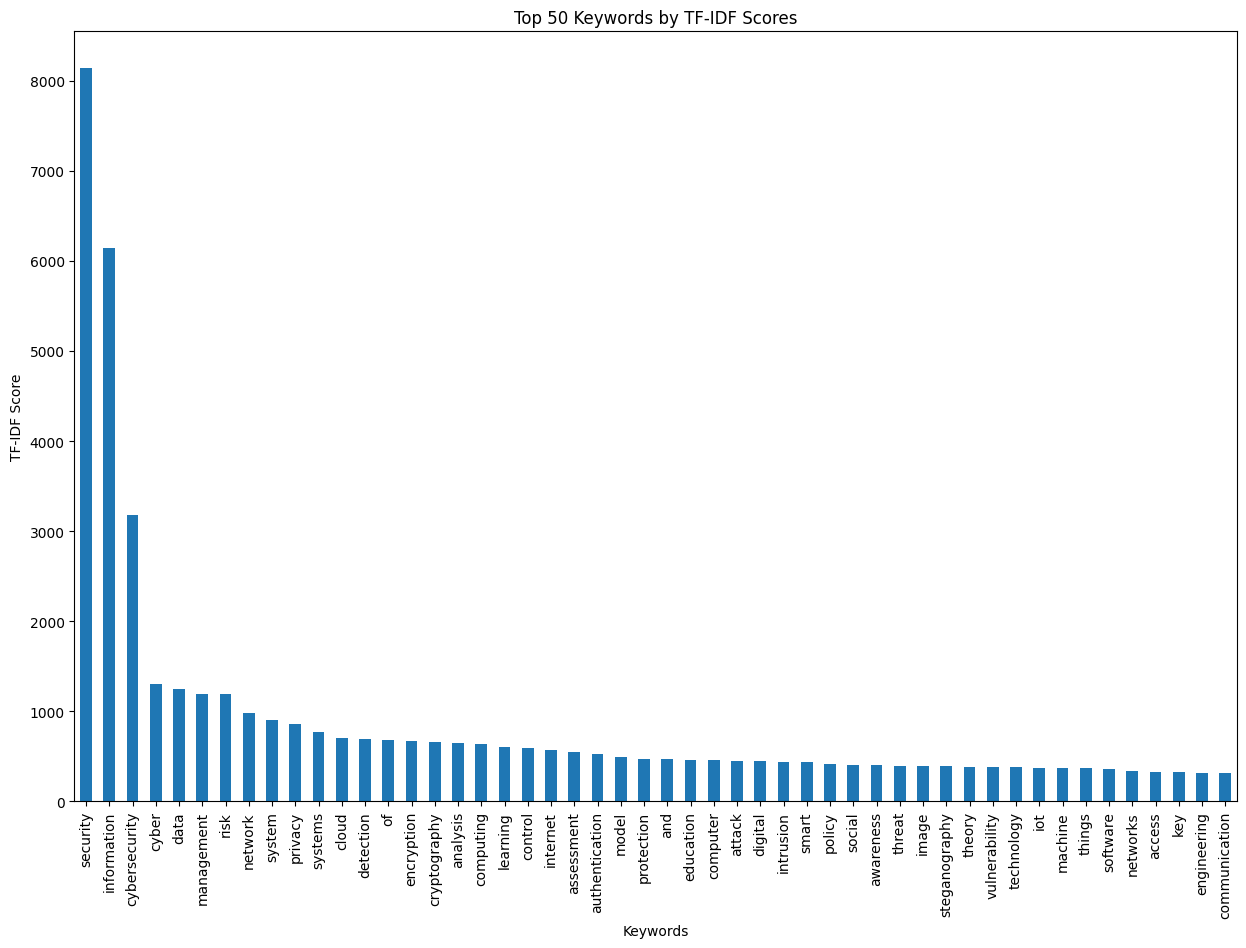

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from collections import Counter

# Asumiendo que 'word_freq' es un Counter con la suma de frecuencias de palabras individuales:

# Convertir las palabras y sus frecuencias a listas
words = list(author_keywords.keys())
frequencies = list(author_keywords.values())

# Crear un vectorizador y calcular los valores TF-IDF para cada palabra
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(words)

# Sumar los valores TF-IDF ponderados por sus frecuencias correspondientes
tfidf_scores = np.multiply(tfidf_matrix.toarray().T, frequencies).T
tfidf_sums = np.sum(tfidf_scores, axis=0)

# Ordenar los scores y seleccionar las 50 palabras clave principales
sorted_indices = np.argsort(tfidf_sums)[::-1][:50]
top_words = np.array(vectorizer.get_feature_names_out())[sorted_indices]
top_scores = tfidf_sums[sorted_indices]

# Crear un DataFrame para los términos y sus puntuaciones TF-IDF
df_tfidf = pd.DataFrame(top_scores, index=top_words, columns=['TF-IDF'])

# Graficar los resultados del top 50
plt.figure(figsize=(15, 10))
df_tfidf['TF-IDF'].plot(kind='bar')
plt.title('Top 50 Keywords by TF-IDF Scores')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=90)
plt.show()



The displayed graph showcases a frequency distribution of TF-IDF scores for the top 50 most significant keywords extracted from a text dataset. Each bar reflects the weighted importance of a keyword, with the vertical axis quantifying the TF-IDF weight and the horizontal axis listing the keywords. The TF-IDF weight is a statistical measure used to ascertain a word's significance within a collection of documents; the taller the bar, the more pertinent the word is within the provided context. The keyword with the highest TF-IDF score is positioned to the far left, signifying it as the most consequential term, and the subsequent bars diminish in height, indicating a progressive decrease in relevance. Such a visualization is instrumental in swiftly pinpointing the dominant themes or concepts in the analyzed material, which is crucial for strategic decision-making and content analysis purposes.

In [ ]:
sorted_indices

NameError: name 'sorted_indices' is not defined